## Plot feature distribution over time

In [3]:
import pandas as pd

races_df = pd.read_csv("../data/races.csv")

races_df

,Unnamed: 0,date_time,race_id,n_runners,number,current_odds,current_place_odds,place,relevance,CurrentOdds,...,JockeyClassWinRate,TrainerDistanceWinRate,TrainerSurfaceWinRate,TrainerTrackWinRate,TrainerClassWinRate,RaceClassDifference,HasJockeyChanged,JockeyWeight,WeightAllowanceExtractor,MaxPastRatingExtractor
0,0,2017-12-01 13:00:00,2415941,11,1,6.5,2.10,4,0,6.5,...,0.107435,NaN,0.083918,0.000000,0.011281,0.0,1.0,74.4,0.0,NaN
1,1,2017-12-01 13:00:00,2415941,11,2,3.5,1.50,2,0,3.5,...,0.199818,NaN,0.202351,NaN,0.166504,0.0,0.0,71.7,0.0,NaN
2,2,2017-12-01 13:00:00,2415941,11,3,26.0,6.00,10,0,26.0,...,0.133849,NaN,0.360164,NaN,0.471882,-1.0,1.0,68.9,0.0,NaN
3,3,2017-12-01 13:00:00,2415941,11,4,101.0,21.00,11,0,101.0,...,0.038470,NaN,0.000000,NaN,0.000000,-2.0,1.0,68.9,0.0,NaN
4,4,2017-12-01 13:00:00,2415941,11,5,34.0,7.60,6,0,34.0,...,0.149075,NaN,0.226764,NaN,0.255685,0.0,1.0,68.9,1.4,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425594,425594,2022-10-17 21:30:00,5445788,13,9,8.0,2.75,12,20,8.0,...,0.171724,NaN,0.155573,0.013562,0.191796,0.0,0.0,57.6,0.0,55.0
425595,425595,2022-10-17 21:30:00,5445788,13,10,19.0,5.50,4,26,19.0,...,0.023688,0.024316,0.221837,0.127027,0.093744,0.0,1.0,57.2,0.0,73.0
425596,425596,2022-10-17 21:30:00,5445788,13,11,26.0,7.25,9,24,26.0,...,0.019138,NaN,0.000000,0.000000,0.000000,0.0,0.0,57.2,0.0,70.0
425597,425597,2022-10-17 21:30:00,5445788,13,12,41.0,11.00,3,26,41.0,...,0.021620,0.135196,0.129004,0.178998,0.009962,0.0,1.0,56.2,0.0,NaN


                  std
year-month           
2017-12     24.628109
2018-01     25.522335
2018-02     29.228855
2018-03     25.841008
2018-04     25.298978
2018-05     21.565653
2018-06     26.074520
2018-07     25.345533
2018-08     20.985275
2018-09     18.389256
2018-10     19.848494
2018-11     21.475881
2018-12     23.340856
2019-01     20.811595
2019-02     18.956283
2019-03     26.451100
2019-04     24.328479
2019-05     21.108422
2019-06     24.797255
2019-07     24.752188
2019-08     18.306019
2019-09     21.959146
2019-10     21.384515
2019-11     24.002598
2019-12     22.716403
2020-01     23.230308
2020-02     19.685200
2020-03     20.010794
2020-06     16.323406
2020-07     19.124572
2020-08     18.399820
2020-09     17.480362
2020-10     18.765801
2020-11     21.859983
2020-12     20.852558
2021-01     18.788717
2021-02     20.104322
2021-03     20.897923
2021-04     17.822946
2021-05     19.029830
2021-06     18.050551
2021-07     16.113105
2021-08     14.197293
2021-09   

<AxesSubplot:xlabel='CurrentSpeedFigure', ylabel='year-month'>

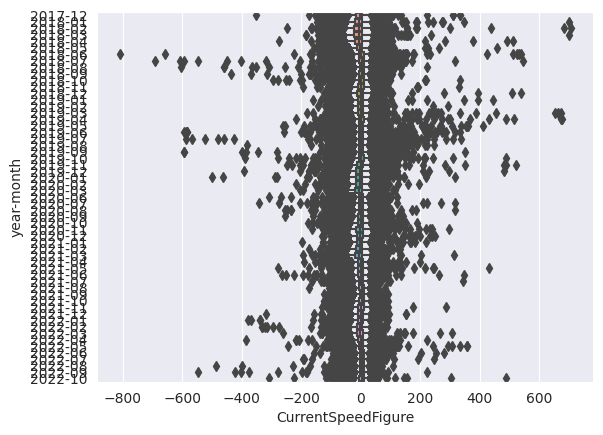

In [4]:
import seaborn as sns

COLUMN_NAME = "CurrentSpeedFigure"
TIME_INTERVAL = "year-month"

races_df["year-month"] = races_df["date_time"].astype(str).str[:7]
races_df["date"] = pd.to_datetime(races_df["date_time"], format='%Y-%m-%d')
races_df["dayofweek"] = races_df["date"].dt.dayofweek.astype(str)
races_df["hour"] = races_df["date"].dt.hour.astype(str)
races_df["minute"] = races_df["date"].dt.minute.astype(str)
races_df["month"] = races_df["date"].dt.month.astype(str)

print(races_df.groupby([TIME_INTERVAL]).agg(std=(COLUMN_NAME, "std")))

sns.boxplot(data=races_df, x=COLUMN_NAME, y=TIME_INTERVAL)

In [55]:
from numpy.random import normal
from scipy.stats import stats
from numpy import std
from math import isnan
from statistics import mean

speed_figures = list(races_df["CurrentSpeedFigure"].values)
speed_figures = [speed_figure for speed_figure in speed_figures if not isnan(speed_figure)]
print(mean(speed_figures))
print(std(speed_figures))

speed_figures_sample = normal(loc=-12.8, scale=20.38, size=10000)
stats.percentileofscore(speed_figures_sample, -20)

-12.800445569308796
20.38557260828779


/tmp/ipykernel_327506/3946010061.py:13: DeprecationWarning: Please use `percentileofscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.percentileofscore(speed_figures_sample, -20)


36.68

# Covariate Shift Detection

## 1.) Between a month and its predecessor

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

races_df = pd.read_csv("../data/races.csv")
races_df["year-month"] = races_df["date_time"].astype(str).str[:7]

month_df = races_df[races_df["year-month"].isin(["2022-09", "2022-08"])]
month_df["label"] = np.where(month_df["year-month"] == "2022-09", 1, 0)

month_df = month_df.fillna(value=-1)

month_df = month_df.drop(["date_time", "race_id", "horse_id", "year-month", "Month_Sin", "Month_Cos", "Unnamed: 0"], axis=1)

print(month_df)

features = [column for column in month_df.columns if column not in ["label"]]
shift_X = month_df.loc[:, features]
scaler = StandardScaler().fit(shift_X)
shift_X = scaler.transform(shift_X)

shift_y = month_df.loc[:, "label"]

X_train, X_test, y_train, y_test = train_test_split(shift_X, shift_y, test_size=0.33, random_state=42, stratify=shift_y)

log_regression_classifier = LogisticRegression(random_state=0).fit(X_train, y_train)
print(f"Classifier score:{log_regression_classifier.score(X_test, y_test)}")

coef_data = {
    "feature name": list([column for column in features]),
    "coeff": list(list(log_regression_classifier.coef_)[0]),
}

coeff_df = pd.DataFrame.from_dict(coef_data)
coeff_df.sort_values(by=["coeff"])

       n_runners  current_odds  current_place_odds  place  has_won  relevance  \
80410         11          4.20                1.64      6        0         27   
80411         11         67.00               14.20      9        0         25   
80412         11         15.00                3.80      3        0         30   
80413         11         41.00                9.00     11        0         17   
80414         11         12.00                3.20      4        0         29   
...          ...           ...                 ...    ...      ...        ...   
92525         10          3.75                1.55      4        0         26   
92526         10         11.00                3.00      9        0         22   
92527         10         12.00                3.20      5        0         25   
92528         10         10.00                2.80      1        1         30   
92529         10         17.00                4.20      3        0         29   

       Current_Odds_Feature

/tmp/ipykernel_8287/2015652303.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_df["label"] = np.where(month_df["year-month"] == "2022-09", 1, 0)


,feature name,coeff
12,Draw_Bias,-0.377124
10,Age,-0.294436
1,current_odds,-0.280174
6,Current_Odds_Feature,-0.280174
11,Current_Rating,-0.240611
18,Hour_Cos,-0.177859
8,Current_Race_Class,-0.164490
14,Current_Race_Track,-0.159514
48,Average_Place_Surface,-0.119077
45,Jockey_Weight,-0.095458


## Production sample inspection

In [1]:
import pandas as pd

production_race_df_1 = pd.read_csv("../data/production_race_5446078.csv")
production_race_df_2 = pd.read_csv("../data/production_race_5440685.csv")

production_race_df_1

,Unnamed: 0,date_time,race_id,n_runners,number,current_odds,current_place_odds,place,relevance,CurrentOdds,...,BreederWinRate,SireWinRate,HorseJockeyWinRate,JockeySurfaceWinRate,JockeyTrackWinRate,TrainerSurfaceWinRate,HasJockeyChanged,JockeyWeight,WeightAllowanceExtractor,MaxPastRatingExtractor
0,0,2022-10-18 20:00:00,5446078,12,1,2.75,1.44,-1,0,2.75,...,0.261924,0.056708,0.435799,0.126878,0.024846,0.195462,False,64.4,0.0,58.0
1,1,2022-10-18 20:00:00,5446078,12,2,2.75,1.44,-1,0,2.50,...,0.130488,0.063022,0.699375,0.164430,0.213140,0.138689,True,61.2,0.0,47.0
2,2,2022-10-18 20:00:00,5446078,12,4,15.00,4.50,-1,0,15.00,...,0.220647,0.049421,0.759890,0.196761,0.212979,0.167330,False,60.3,0.0,71.0
3,3,2022-10-18 20:00:00,5446078,12,5,34.00,9.25,-1,0,34.00,...,0.006248,0.175394,NaN,0.062829,0.121009,0.128392,True,59.4,0.0,68.0
4,4,2022-10-18 20:00:00,5446078,12,6,12.00,3.75,-1,0,13.00,...,0.000000,0.147867,NaN,0.118205,0.176800,0.109385,True,59.0,0.0,67.0
5,5,2022-10-18 20:00:00,5446078,12,7,9.00,3.00,-1,0,8.50,...,0.244272,0.161888,NaN,0.013944,0.000000,0.004194,True,59.0,3.2,59.0
6,6,2022-10-18 20:00:00,5446078,12,8,10.00,3.25,-1,0,11.00,...,0.000000,0.121089,NaN,0.076450,0.120673,0.051970,True,57.6,0.0,59.0
7,7,2022-10-18 20:00:00,5446078,12,9,51.00,13.50,-1,0,67.00,...,0.031932,0.296647,0.000000,0.038508,0.034015,0.049094,False,57.6,0.0,66.0
8,8,2022-10-18 20:00:00,5446078,12,10,34.00,9.25,-1,0,51.00,...,0.000000,0.028572,NaN,0.001067,0.001585,0.109385,True,56.7,0.0,NaN
9,9,2022-10-18 20:00:00,5446078,12,12,101.00,26.00,-1,0,101.00,...,0.000503,0.083232,NaN,0.000230,0.000000,0.033768,True,55.3,2.3,57.0
